# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from math import e
%matplotlib inline
import seaborn as sns
sns.set()

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

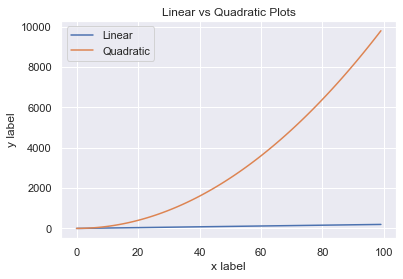

In [3]:
plt.plot(x,y, label='Linear')
plt.plot(x,z, label='Quadratic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title('Linear vs Quadratic Plots')
plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

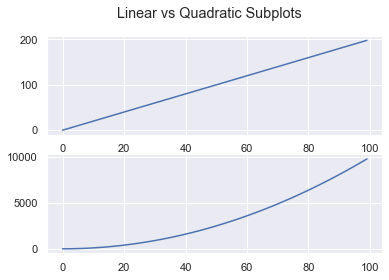

In [4]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Linear vs Quadratic Subplots')
ax1.plot(x, y)
ax2.plot(x, z)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

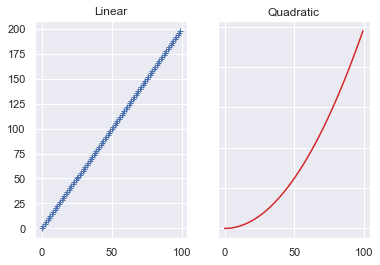

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y,'+')
ax1.set_title('Linear')
ax2.plot(x, z, 'tab:red')
ax2.set_title('Quadratic')

for ax in fig.get_axes():
    ax.label_outer()  
    
plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

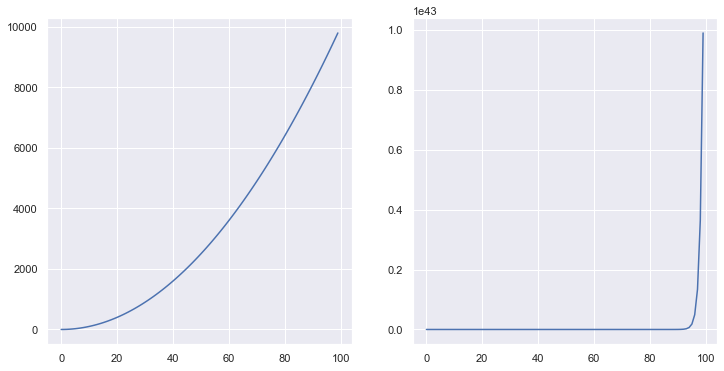

In [6]:
f, axs = plt.subplots(1,2,figsize=(12,6))

axs[0].plot(x, x**2)

axs[1].plot(x, e**x)

#### As a bonus challenge, try to add a legend to the plot.

In [7]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit = pd.read_csv('Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

([<matplotlib.axis.XTick at 0x133d30390>,
 [Text(0, 0, 'Weekend'), Text(0, 0, 'Workday')])

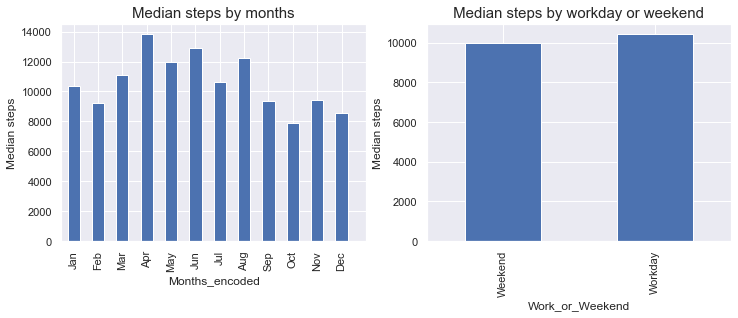

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
fig, ax = plt.subplots(1,2, figsize=(12,4))

plt.sca(ax[0])

fitbit.groupby(['Months_encoded']).median()['Steps'].plot(kind = 'bar')
plt.title('Median steps by months', fontsize = 15)
plt.xlabel('Months_encoded')
plt.ylabel('Median steps')
plt.xticks(range(13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# MEDIAN STEPS BY WORK_OR_WEEKEND
plt.sca(ax[1])

fitbit.groupby(['Work_or_Weekend']).median()['Steps'].plot(kind = 'bar')
plt.title(' Median steps by workday or weekend ', fontsize = 15)
plt.xlabel('Work_or_Weekend')
plt.ylabel('Median steps')
plt.xticks(range(2), ['Weekend', 'Workday'])

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

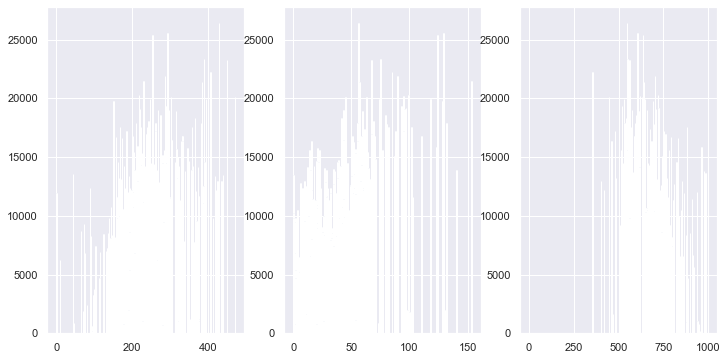

In [10]:
fig, ax = plt.subplots(1,3,figsize=(12,6))
strlist = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
for i in strlist:
    ax[strlist.index(i)].bar(fitbit[i], fitbit['Steps'] )

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
df = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [12]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
# Survived, Pclass, Age, Siblings/Spouses Aboard, Parents/Children Aboard, Fare

In [14]:
# CATEGORICAL VARIABLES
# Name, Sex

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
plt.figure(figsize=(12,6))
matplotlib.style.use('classic')

<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

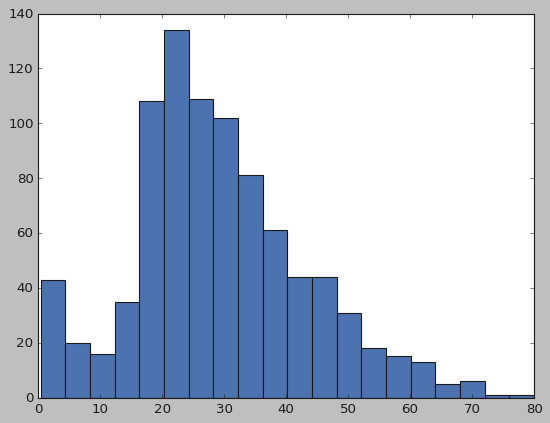

In [16]:
plt.hist(df['Age'], bins = 20)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

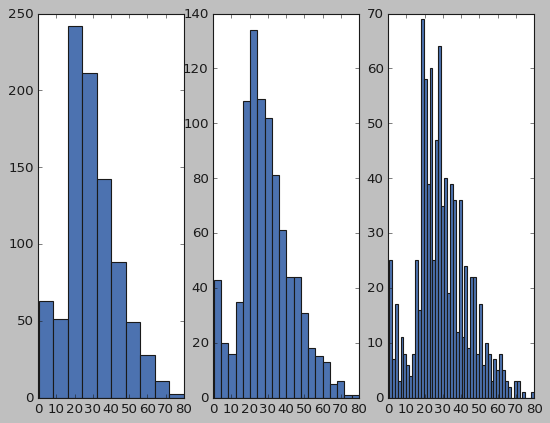

In [17]:
bins = [10, 20, 50]

f, ax = plt.subplots(1, 3)

for i in range(len(bins)):
    ax[i].hist(df['Age'], bins = bins[i])

#### How does the bin size affect your plot?

In [18]:
"""
Larger the bin size the more detailed the histogram
"""

'\nLarger the bin size the more detailed the histogram\n'

#### Use seaborn to show the distribution of column `Age`.

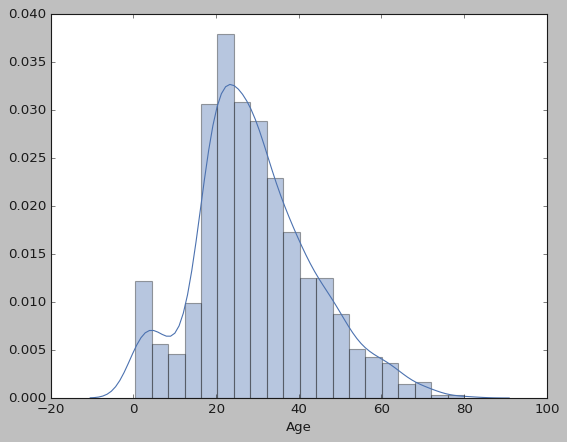

In [19]:
sns.distplot(df['Age'], bins = 20)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([573., 314.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

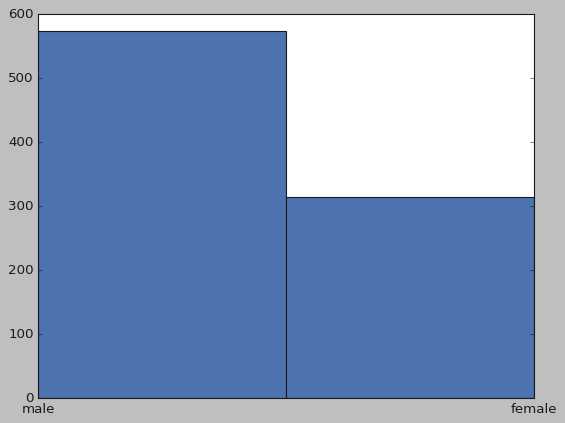

In [20]:
# Method 1 - matplotlib
plt.hist(df['Sex'], bins=2)

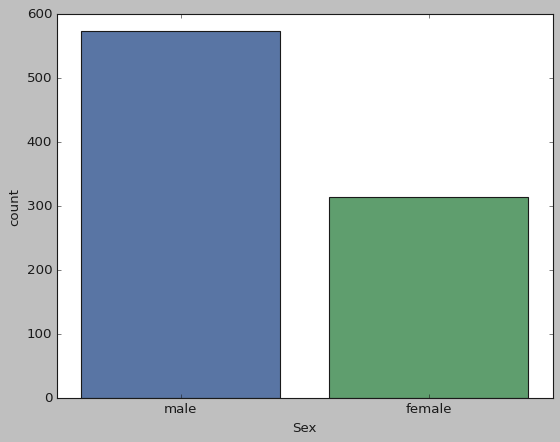

In [21]:
# Method 2 - seaborn
sns.countplot(x=df['Sex'])

#### Use the right plot to visualize the column `Pclass`.

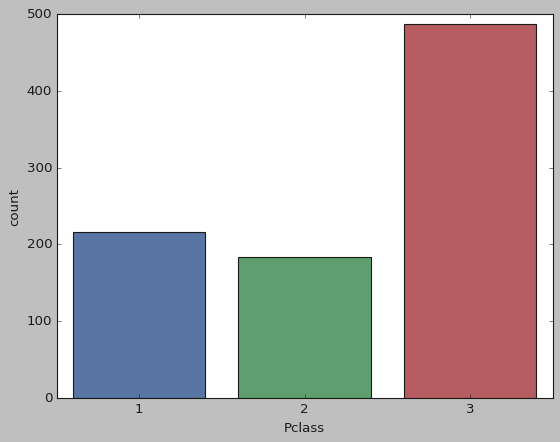

In [22]:
sns.countplot(df['Pclass'])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

Text(0.6, 0.5, 'count    887.000000\nmean      29.471443\nstd       14.121908\nmin        0.420000\n25%       20.250000\n50%       28.000000\n75%       38.000000\nmax       80.000000')

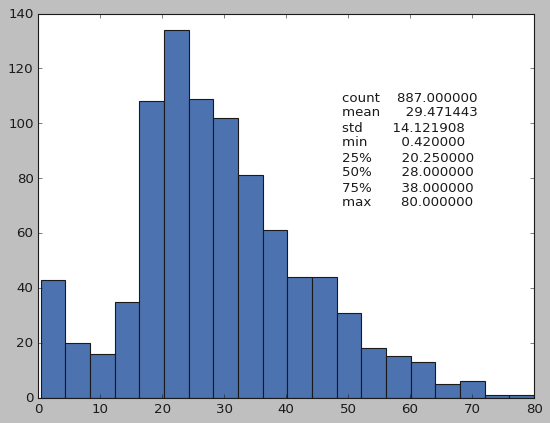

In [23]:
fig, ax = plt.subplots()
ax.hist(df['Age'], bins=20)
plt.figtext(0.6,0.5, df['Age'].describe().to_string())

In [24]:
"""
Data shown is maximised 
"""

'\nData shown is maximised \n'

#### What does the last plot tell you about the feature `Age`?

In [25]:
"""
The mean age in 29.47 years
"""

'\nThe mean age in 29.47 years\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

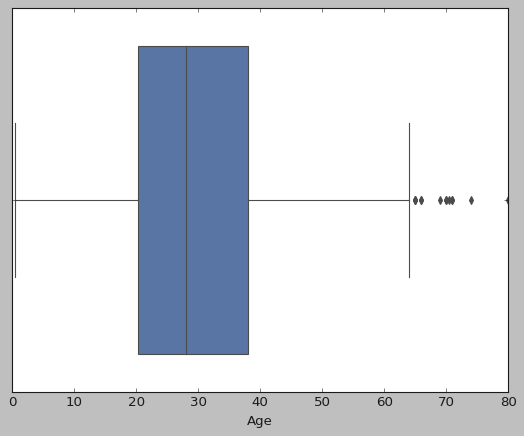

In [26]:
sns.boxplot(x=df["Age"])

#### What additional information does the last plot provide about feature `Age`?

In [27]:
"""
The 25th percentile is just above the age of 20 and the 75th percentile is just below the age of 40
"""

'\nThe 25th percentile is just above the age of 20 and the 75th percentile is just below the age of 40\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

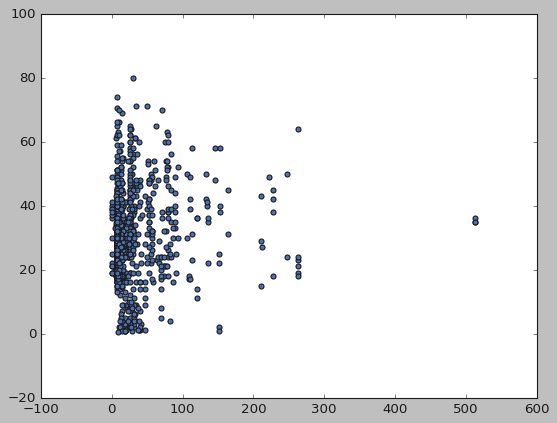

In [28]:
# Method 1 - matplotlib
plt.scatter(df['Fare'], df['Age'])

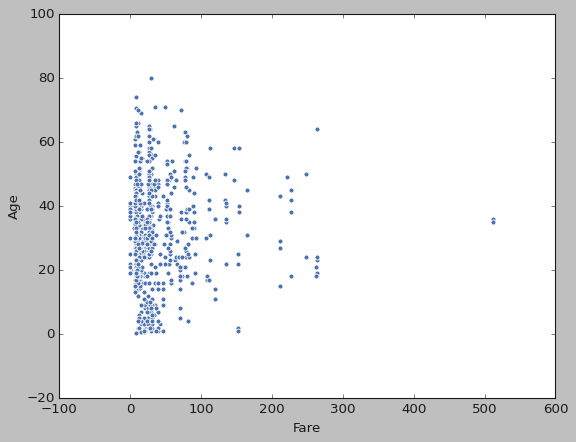

In [29]:
# Method 2 - seaborn
sns.scatterplot(df['Fare'], df['Age'])

#### Plot the correlation matrix using seaborn.

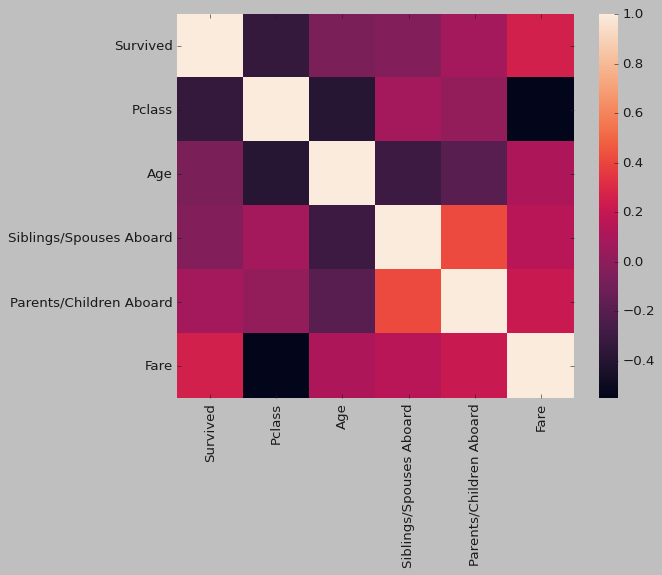

In [30]:
sns.heatmap(df.corr())

#### What are the most correlated features?

In [31]:
"""
Siblings/Spouses Aboard, Parents/Children Aboard
"""

'\nSiblings/Spouses Aboard, Parents/Children Aboard\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

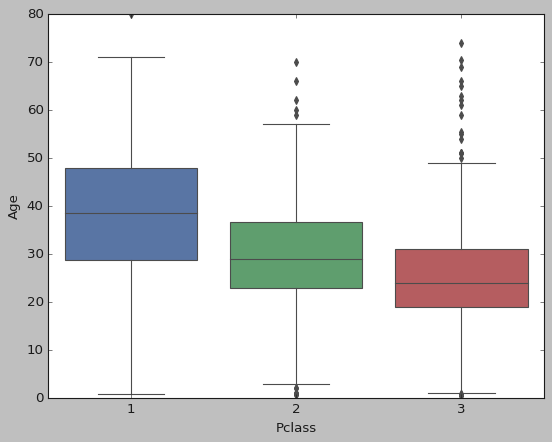

In [32]:
sns.boxplot(x="Pclass", y="Age", data=df)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.